<a href="https://colab.research.google.com/github/mridulsyed/Algorithm/blob/master/Parsiiii_mediapipe_pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pose Estimation of Images**

In [75]:
!pip install mediapipe

In [76]:
from google.colab import files
uploaded = files.upload()

Saving image1.jpg to image1 (2).jpg
Saving image2.jpg to image2 (2).jpg


image1.jpg


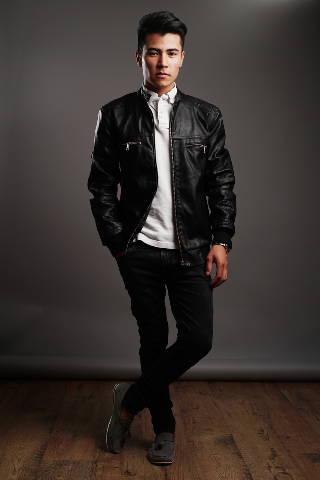

image2.jpg


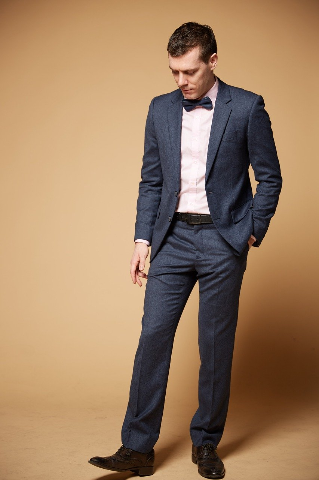

In [77]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Pose solution, we can access this module as `mp_pose = mp.solutions.pose`.

The parameters can be changed, such as `static_image_mode` and `min_detection_confidence`, during the initialization. Run `help(mp_pose.Pose)` to get more informations about the parameters.

In [78]:
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

#help(mp_pose.Pose)

Nose coordinates: (440.7771223783493, 171.14078521728516)
Pose landmarks of image1.jpg:


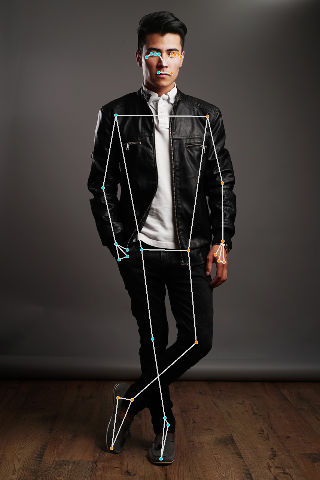

Nose coordinates: (498.15534830093384, 226.76010131835938)
Pose landmarks of image2.jpg:


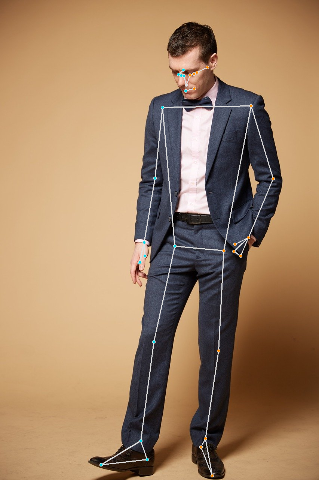

In [79]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    )

    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    resize_and_show(annotated_image)

Nose world landmark:
x: -0.006385801360011101
y: -0.594690203666687
z: -0.3049235939979553
visibility: 0.9999525547027588



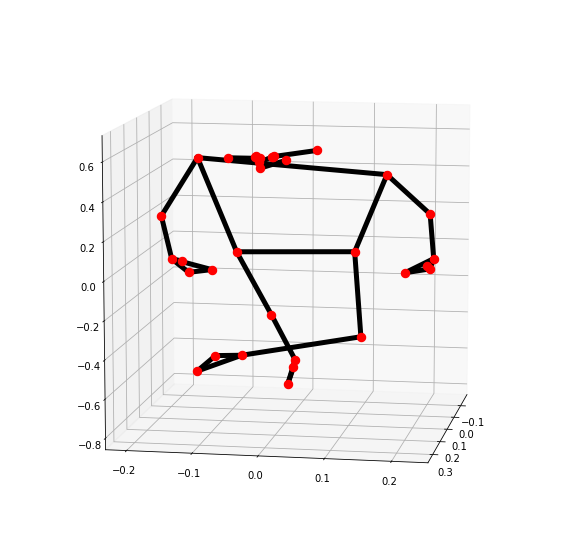

Nose world landmark:
x: -0.062275927513837814
y: -0.5126816034317017
z: -0.36159199476242065
visibility: 0.997610330581665



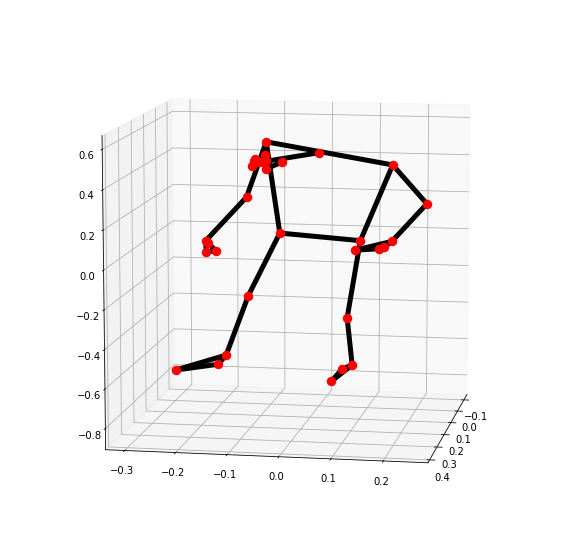

In [80]:
# Run MediaPipe Pose and plot 3d pose world landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print the real-world 3D coordinates of nose in meters with the origin at
    # the center between hips.
    print('Nose world landmark:'),
    print(results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE])
    
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

**Pose Estimation of Videos**

In [81]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('human.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [82]:
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from time import sleep

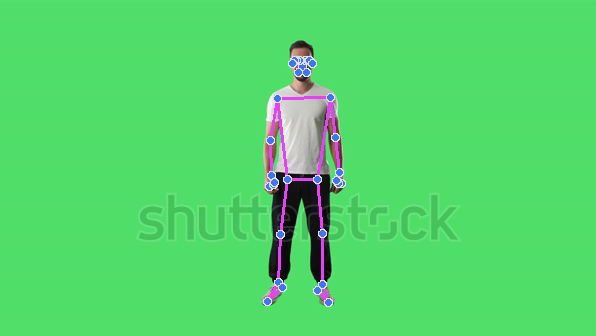

Stream End


In [83]:
cap = cv2.VideoCapture("human.mp4")
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
          #print("Stream End")
          break

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                )               
        
        #cv2_imshow(image)
        clear_output()
        cv2_imshow(image)
        sleep(0.1)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


    cap.release()
    cv2.destroyAllWindows()

In [84]:
landmarks = results.pose_landmarks.landmark
print(landmarks)

[x: 0.5069672465324402
y: 0.19732291996479034
z: -0.24109286069869995
visibility: 0.9999789595603943
, x: 0.51321941614151
y: 0.1804884672164917
z: -0.2277933955192566
visibility: 0.9999185800552368
, x: 0.5167897343635559
y: 0.18043269217014313
z: -0.22780358791351318
visibility: 0.9999140501022339
, x: 0.5193057656288147
y: 0.18045322597026825
z: -0.22778181731700897
visibility: 0.9999032020568848
, x: 0.5017361640930176
y: 0.18060219287872314
z: -0.2269783765077591
visibility: 0.9999202489852905
, x: 0.49827781319618225
y: 0.18063299357891083
z: -0.2269686460494995
visibility: 0.9999164342880249
, x: 0.49487006664276123
y: 0.1809961348772049
z: -0.226985901594162
visibility: 0.9999138116836548
, x: 0.5239743590354919
y: 0.18815350532531738
z: -0.1334131807088852
visibility: 0.9998094439506531
, x: 0.49140724539756775
y: 0.18857304751873016
z: -0.1292557418346405
visibility: 0.9998287558555603
, x: 0.5139576196670532
y: 0.2151281237602234
z: -0.20439864695072174
visibility: 0.9999655

In [86]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [87]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [88]:
l_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
l_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

In [89]:
l_hip, l_knee, l_ankle

([0.5334771871566772, 0.5349381566047668],
 [0.5408505797386169, 0.6939080953598022],
 [0.5407542586326599, 0.8459675908088684])

In [90]:
calculate_angle(l_hip, l_knee, l_ankle)

177.30809916051913

In [92]:
tuple(np.multiply(l_hip, [640, 480]).astype(int))

(341, 256)

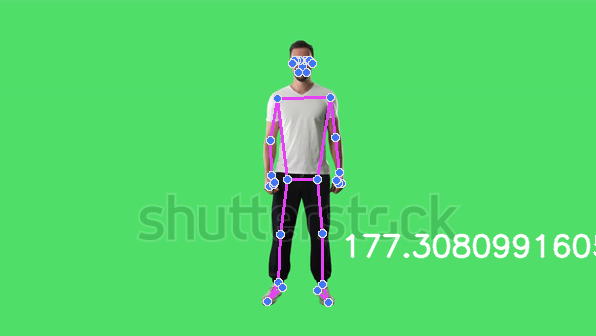

In [93]:
cap = cv2.VideoCapture("human.mp4")
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
          #print("Stream End")
          break

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        landmarks = results.pose_landmarks.landmark

        l_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        l_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            
        # Calculate angle
        angle = calculate_angle(l_hip, l_knee, l_ankle)
            
        # Visualize angle
        cv2.putText(image, str(angle), 
                           tuple(np.multiply(l_hip, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA
                    )
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                )               
        
        #cv2_imshow(image)
        clear_output()
        cv2_imshow(image)
        sleep(0.1)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


    cap.release()
    cv2.destroyAllWindows()           
           
           
           
           

In [94]:
angle_norm = []
cap = cv2.VideoCapture("normal-gait.mp4")
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
          #print("Stream End")
          break

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        landmarks = results.pose_landmarks.landmark

        l_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        l_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            
        # Calculate angle
        
        angle = calculate_angle(l_hip, l_knee, l_ankle)
        angle_norm.append(angle)
        print(angle)
            
        # Visualize angle
        cv2.putText(image, str(angle), 
                           tuple(np.multiply(l_hip, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA
                    )
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                )               
        
        #cv2_imshow(image)
        #clear_output()
        #cv2_imshow(image)
        #sleep(0.1)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


    cap.release()
    cv2.destroyAllWindows()           
           
           
           
           

172.7654847766264
174.03053644412847
174.8691471635022
175.60382998880178
175.58011075257684
175.75813928274272
175.65979421928517
175.70318922005325
175.93624674839728
176.34291774742113
176.3555555080972
176.3416415599967
176.2446416051693
175.72634947315888
175.9766885750475
176.49193531222977
176.69985922435959
176.7506704505794
176.7956941049341
176.6439855057197
175.77391435933674
173.4555083864698
172.9077824934812
171.5604294335459
170.20900402236575
169.19668196910035
169.57184424543337
169.10919021432832
167.97193840600053
168.55695210141707
169.4657888023945
170.4981650720373
171.20046721365281
172.22656157648316
172.51431968023334
173.1623258800355
173.35521581300895
174.04043523045763
174.4956630003813
173.88786263647947
173.594833374303
172.86003299579144
172.3233674615163
171.92300094440748
171.52407476910136
170.6435224516204
169.33263620787025
167.0012448974721
166.93190775664414
163.9675217669086
160.76219548801086
155.9728264309713
154.48825001621256
152.745719349722

In [ ]:
#for x in range(len(angle_norm)):
#    print(angle_norm[x])


In [95]:
def Average(lst):
    return sum(lst) / len(lst)

print(len(angle_norm)) 
Average(angle_norm)

224


166.64581463850064

In [96]:
angle_ab = []
cap = cv2.VideoCapture("abnormal-gait.mp4")
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
          #print("Stream End")
          break

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        landmarks = results.pose_landmarks.landmark

        l_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        l_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            
        # Calculate angle
        angle = calculate_angle(l_hip, l_knee, l_ankle)
        angle_ab.append(angle)
        print(angle)
            
        # Visualize angle
        cv2.putText(image, str(angle), 
                           tuple(np.multiply(l_hip, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA
                    )
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                )               
        
        #cv2_imshow(image)
        #clear_output()
        #cv2_imshow(image)
        #sleep(0.1)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


    cap.release()
    cv2.destroyAllWindows()           
                 
           

175.21860146872325
176.46020987622842
177.37888934128748
179.7505734605371
179.84092778665172
179.62461227899027
179.3258556598419
178.2132554889202
176.53495808595306
175.4217828028135
175.3292599568571
174.8460658263883
174.34839147524826
174.13429153471242
173.79282269721028
172.51604250562178
174.73794056672955
175.62855669788038
175.89755042362103
175.7163556838371
175.27541643284417
176.47777326699793
177.27951650642132
179.09054662632772
179.25244187170077
177.49916266072182
179.19858273134838
175.9592412041146
179.12761935927315
176.84428919512925
179.5183324311366
179.91708363165384
179.93862695838604
179.9603426426314
177.8713530324491
175.2565620774649
175.2915847686348
175.179152855343
177.1238224549681
179.35059724927362
173.1252840029634
173.71762855657545
174.40968600136455
176.07863332640363
175.73102848347102
176.5890387669779
176.49386015597028
176.58479505001492
176.59532512415015
179.8365421338278
178.25831648282556
178.4868171556478
178.6618600129672
178.7390168575

In [ ]:
#for x in range(len(angle_ab)):
 #   print(angle_ab[x])


In [97]:
def Average(lst):
    return sum(lst) / len(lst)
print(len(angle_ab))  
Average(angle_ab)

180


174.67877009562443

In [98]:
final_angle = []
cap = cv2.VideoCapture("abnormal-gait.mp4")

normal = 0

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
          #print("Stream End")
          break

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        landmarks = results.pose_landmarks.landmark

        l_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        l_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            
        # Calculate angle
        angle = calculate_angle(l_hip, l_knee, l_ankle)
        final_angle.append(angle)
            
        # Visualize angle
        cv2.putText(image, str(angle), 
                           tuple(np.multiply(l_hip, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA
                    )
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                )               
        
        #cv2_imshow(image)
        #clear_output()
        #cv2_imshow(image)
        #sleep(0.1)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    def Average(lst):
      return sum(lst) / len(lst)
    
 
    Average(angle_ab)
    if  Average(final_angle) > 170:
     print("Abnormal Gait")
    else: 
     print("Normal Gait")

    cap.release()
    cv2.destroyAllWindows()           
           
           
           
           

Abnormal Gait


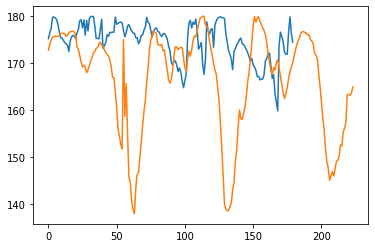

In [99]:
import matplotlib.pyplot as plt
plt.plot(angle_ab)
plt.plot(angle_norm)
plt.show()